In [31]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

**case study 1**

In [59]:
df1=pd.read_excel(r'C:\Users\sahur\Downloads\febricdata.xlsx')
df1.head()

,Fabric_length
0,151.2
1,160.3
2,147.5
3,149.2
4,159.2


In [65]:
df1['Fabric_length'].skew()

0.29650632012590666

<Axes: xlabel='Fabric_length', ylabel='Count'>

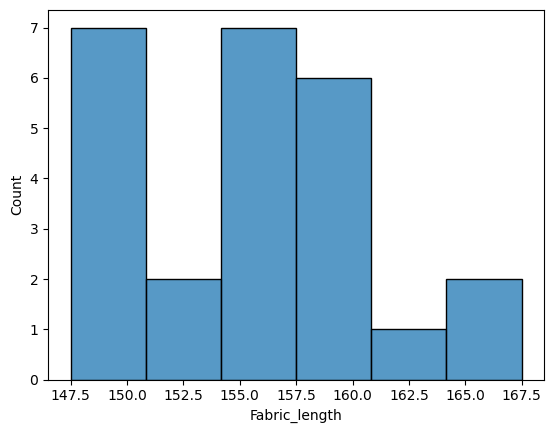

In [67]:
sns.histplot(df1['Fabric_length'])

<Axes: xlabel='Fabric_length', ylabel='Density'>

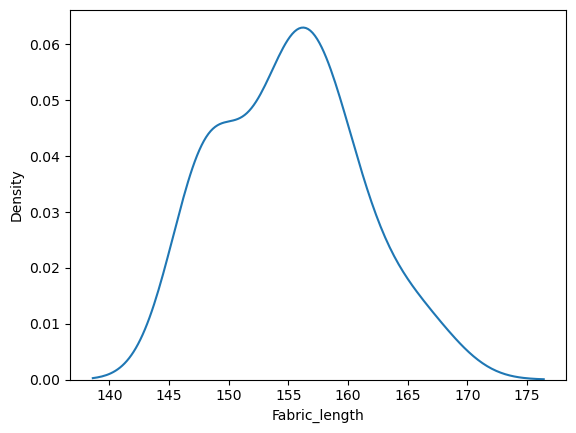

In [69]:
sns.kdeplot(df1['Fabric_length'])

In [71]:
from scipy import stats
stats.shapiro(df1['Fabric_length'])

ShapiroResult(statistic=0.9397524078584506, pvalue=0.1460935830606142)

In [77]:
from statsmodels.stats.weightstats import ztest

ztest = ztest(df1['Fabric_length'],
              value=150,
              alternative = 'two-sided',
              ddof=0)
ztest

(4.581553935379281, 4.615335331740764e-06)

In [1]:
import numpy as np
from scipy.stats import norm

# Given data
population_mean = 30  # Population mean (μ)
sample_mean = 28  # Sample mean (x̄)
population_std = 5  # Population standard deviation (σ)
sample_size = 50  # Sample size (n)

# Calculate the standard error of the mean (SEM)
sem = population_std / np.sqrt(sample_size)

# Calculate the z-score
z_score = (sample_mean - population_mean) / sem

# Calculate the p-value (two-tailed test)
p_value = 2 * (1 - norm.cdf(abs(z_score)))

# Output the results
print(f"Z-Score: {z_score:.2f}")
print(f"P-Value: {p_value:.4f}")

# Decision based on significance level (α = 0.05)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The sample mean is significantly different from the population mean.")
else:
    print("Fail to reject the null hypothesis: No significant difference between the sample and population mean.")


Z-Score: -2.83
P-Value: 0.0047
Reject the null hypothesis: The sample mean is significantly different from the population mean.


In [3]:
import numpy as np

# Generate one random value from a normal distribution with mean=0 and std=1
random_value = np.random.normal()
print(random_value)


-0.07226788492722812


In [5]:
# Generate 10 random values from a normal distribution with mean=5 and std=2
random_values = np.random.normal(loc=5, scale=2, size=10)
print(random_values)


[4.02032367 4.17469215 6.53111157 6.14341307 4.76252199 3.92954571
 9.26714509 1.77122552 3.77149564 5.87961359]


In [9]:
# Generate a 2D array (3x4) of random values
random_array = np.random.normal(loc=0, scale=1, size=(2, 2))
print(random_array)


[[ 0.44052616  0.05887496]
 [-0.23290182 -1.97196686]]


In [11]:
import numpy as np
from statsmodels.stats.weightstats import ztest

# Generate sample data
np.random.seed(42)
sample = np.random.normal(loc=495, scale=10, size=30)  # Mean=495, Std=10, n=30

# Perform one-sample z-test
z_stat, p_value = ztest(sample, value=500)

print(f"Z-Statistic: {z_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# Decision based on significance level (alpha = 0.05)
if p_value < 0.05:
    print("Reject the null hypothesis: The sample mean is significantly different from 500.")
else:
    print("Fail to reject the null hypothesis: No significant difference from 500.")


Z-Statistic: -4.1879
P-Value: 0.0000
Reject the null hypothesis: The sample mean is significantly different from 500.


In [15]:
# One-sided z-test (alternative='larger')
z_stat, p_value = ztest(sample, value=500, alternative='larger')

print(f"Z-Statistic: {z_stat:.4f}")
print(f"P-Value: {p_value:.4f}")


Z-Statistic: -4.1879
P-Value: 1.0000


In [3]:
import pandas as pd
import numpy as np
from statsmodels.stats.weightstats import ztest

# Generate sample data
np.random.seed(42)  # For reproducibility
data = np.random.normal(loc=495, scale=10, size=30)  # Mean=495, Std=10, n=30

# Create a DataFrame
df = pd.DataFrame(data, columns=["Weight"])

# Perform one-sample z-test
z_stat, p_value = ztest(df["Weight"], value=500,alternative = 'two-sided')

# Output results
print(f"Z-Statistic: {z_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# Decision Rule
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The sample mean is significantly different from 500.")
else:
    print("Fail to reject the null hypothesis: No significant difference from 500.")


Z-Statistic: -4.1879
P-Value: 0.0000
Reject the null hypothesis: The sample mean is significantly different from 500.


**ANOVA TEST**

**You want to test if three different teaching methods result in different average test scores among students.**

###### Group A: Traditional classroom teaching
###### Group B: Online video tutorials
###### Group C: Blended learning

In [26]:
import pandas as pd
df=pd.DataFrame({'A':[85,78,92,88,76], # A = Group A
                 'B':[89,90,94,82,87], # B= Group B
            
                 'C':[92,95,88,91,90]}) # c = Group C
df

,A,B,C
0,85,89,92
1,78,90,95
2,92,94,88
3,88,82,91
4,76,87,90


In [28]:
df['A'].skew(),df['B'].skew(),df['C'].skew()


(-0.05824593405068644, -0.417510400457309, 0.5016571985664442)

In [16]:
from scipy.stats import norm

In [30]:
anova_test = stats.f_oneway(df['A'],df['B'],df['C'])
anova_test

F_onewayResult(statistic=2.9410112359550555, pvalue=0.0913245747085701)

In [24]:
import scipy.stats as stats

# Data
group_a = [85, 78, 92, 88, 76]
group_b = [89, 90, 94, 82, 87]
group_c = [92, 95, 88, 91, 90]

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(group_a, group_b, group_c)

# Output results
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: At least one group mean is different.")
else:
    print("Fail to reject the null hypothesis: No significant difference between group means.")


F-statistic: 2.9410112359550555
P-value: 0.0913245747085701
Fail to reject the null hypothesis: No significant difference between group means.


**PROPORTION TEST**

**You toss a coin 10 times and observe 8 heads. You want to test if the coin is fair ( 𝑝 = 0.5 p=0.5).**

In [37]:
binom_test=stats.binomtest(8,10,0.5)
binom_test

BinomTestResult(k=8, n=10, alternative='two-sided', statistic=0.8, pvalue=0.109375)

In [45]:
import scipy.stats as stats

# Data
k = 8       # Number of successes (heads)
n = 10      # Total number of trials
p = 0.5     # Hypothesized proportion of success (fair coin)

# Perform binomial test
result = stats.binomtest(k, n, p, alternative='two-sided')

# Output
print(f"Number of successes: {result.statistic}")
print(f"P-value: {result.pvalue}")

# Interpretation
alpha = 0.05
if result.pvalue < alpha:
    print("Reject the null hypothesis: The coin may not be fair.")
else:
    print("Fail to reject the null hypothesis: No evidence the coin is unfair.")


Number of successes: 0.8
P-value: 0.109375
Fail to reject the null hypothesis: No evidence the coin is unfair.


**CHI-SQUARE TEST**

In [ ]:
S= stats.chi2_contingency()

In [13]:
import scipy.stats as stats

# Observed data (contingency table)
observed = [[30, 20],  # Male: Coffee, Tea
            [25, 25]]  # Female: Coffee, Tea

# Perform Chi-Square Test for Independence
chi2, p, dof, expected = stats.chi2_contingency(observed)

# Results
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

# Interpretation
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: There is a significant association between gender and beverage preference.")
else:
    print("Fail to reject the null hypothesis: No significant association between gender and beverage preference.")


Chi-Square Statistic: 0.6464646464646464
P-value: 0.4213795037428696
Degrees of Freedom: 1
Expected Frequencies:
[[27.5 22.5]
 [27.5 22.5]]
Fail to reject the null hypothesis: No significant association between gender and beverage preference.


In [50]:
df=pd.DataFrame({'male':[30,20],
                 'female':[25,25]})
df

,male,female
0,30,25
1,20,25


In [60]:
df1=pd.crosstab(df['female'],df['male'],margins=True)
df1

male,20,30,All
female,,,
25,1,1,2
All,1,1,2


In [62]:
s=stats.chi2_contingency(df1)
s

Chi2ContingencyResult(statistic=0.0, pvalue=1.0, dof=2, expected_freq=array([[1., 1., 2.],
       [1., 1., 2.]]))

In [5]:
df=pd.DataFrame({'Gender':['Male','Female'],
                 'Like product':[60,40],
                 "Don't like product":[40,50]})
df

,Gender,Like product,Don't like product
0,Male,60,40
1,Female,40,50


In [7]:
count=pd.crosstab(df['Gender'],df['Like product'])
count

Like product,40,60
Gender,,
Female,1,0
Male,0,1


In [23]:
data={'Like product':[60,50],
"Don't like product":[40,50]}

df=pd.DataFrame(data, index=['male','female'])
df

,Like product,Don't like product
male,60,40
female,50,50


In [29]:
s=stats.chi2_contingency(df)
s

Chi2ContingencyResult(statistic=1.6363636363636362, pvalue=0.20082512269514174, dof=1, expected_freq=array([[55., 45.],
       [55., 45.]]))

In [19]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create the observed frequency table (contingency table)
data = {
    'Like Product': [60, 50],
    'Don\'t Like Product': [40, 50]
}

# Create a pandas DataFrame
df = pd.DataFrame(data, index=['Male', 'Female'])

# Perform the Chi-Square test
chi2_stat, p_val, dof, expected = chi2_contingency(df)

# Display the results
print("Chi-Square Statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(expected)

# Determine the significance level
alpha = 0.05
if p_val < alpha:
    print("\nReject the null hypothesis: There is a significant relationship between gender and product preference.")
else:
    print("\nFail to reject the null hypothesis: There is no significant relationship between gender and product preference.")


Chi-Square Statistic: 1.6363636363636362
P-value: 0.20082512269514174
Degrees of Freedom: 1
Expected Frequencies Table:
[[55. 45.]
 [55. 45.]]

Fail to reject the null hypothesis: There is no significant relationship between gender and product preference.
